In [3]:
import PIL

In [4]:
PIL.__version__

'7.0.0'

In [4]:
dir(PIL)

['UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plugins']

In [5]:
from PIL import Image

#### Open image

In [6]:
img = Image.open('./snap0174.png')

In [7]:
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=212x46 at 0x7F82B42ADFD0>


In [8]:
img.show()

#### Why it's not shown here, locally woh??
So just use `display` from IPython instead

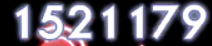

In [9]:
from IPython.display import display
display(img)

#### Characterize the image object

The getmro function will return a list of all of the classes that are being inherited by a given object

In [14]:
import inspect
print('The type of image is ' + str(type(img)))
inspect.getmro(type(img))

The type of image is <class 'PIL.PngImagePlugin.PngImageFile'>


(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

The `getmro` can know the object heritance

## Common functions in Pillow

In [12]:
help(img.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.PngImagePlugin.PngImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [13]:
help(img.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.PngImagePlugin.PngImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename ext

Note that the `save()` function can convert the type of the image object

### Filters

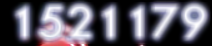

In [17]:
from PIL import ImageFilter
#help(ImageFilter)

#image = image.convert('RGB')
blurred_img = img.filter(PIL.ImageFilter.BLUR) # blur filter
display(blurred_img)

### Crop

In [18]:
print("{} x {}".format(img.width, img.height)) # it shows the pixel size

212 x 46


The first parameter to the function is a tuple which is the left, upper, right, and lower values of the X/Y coordinates.
The coordinates start from upper left corner (0, 0), so (A, B , C, D) -> (A. B) is the position of the upper left corner of the cropped box, (C, D) is the lower right corner position.

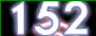

In [55]:
display(img.crop((4, 4, 100, 40)))

### Draw

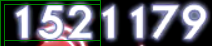

In [54]:
from PIL import ImageDraw
drawing_obj = ImageDraw.Draw(img)
drawing_obj.rectangle((4, 4, 100, 40), fill = None, outline = 'green')
display(img)

### Contact sheet

A task that is fairly common in image and picture manipulation is to create contact sheets of images. A contact sheet is one image that actually contains several other different images. In particular, lets change the brightness of the image in ten different ways, then scale the image down smaller, and put them side by side so we can get the sense of which brightness we might want to use.

In [58]:
from PIL import ImageEnhance
enhancer = ImageEnhance.Brightness(img)
type(enhancer) # a brightness object was created

PIL.ImageEnhance.Brightness

In [60]:
images = []
for i in range(0, 10):
    images.append(enhancer.enhance(i/10))

print(images)

[<PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CAE10>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CAE90>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CAF10>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CAF90>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CEA50>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CE110>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CE190>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CE210>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CE290>, <PIL.Image.Image image mode=RGBA size=212x46 at 0x7F82849CE0D0>]


In [61]:
# Lets take these images now and composite them, one above another, in a contact sheet.
# There are several different approaches we can use, but I'll simply create a new image which is like
# the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



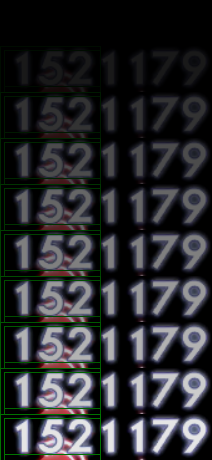

In [65]:
first_image = images[0]
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width, 10 * first_image.height))

# So now we have a black image that's ten times the size of the other images in the contact_sheet
# variable. Now lets just loop through the image list and paste() the results in. The paste() function
# will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y)
# offset for that image. In our case, the x position is always 0, but the y location will change by
# 450 pixels each time we iterate through the loop.

current_location = 0
for img in images:
    contact_sheet.paste(img, (0, current_location))
    current_location = current_location + first_image.height

# Then resize the sheet for display
#contact_sheet = contact_sheet.resize((212, 82))
display(contact_sheet)

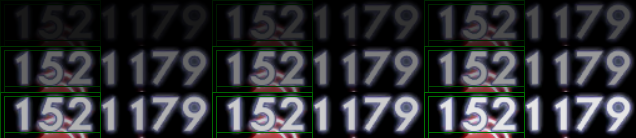

In [68]:
# Ok, that's a nice proof of concept. But it's a little tough to see. Lets instead change this to a three
# by three grid of values. First thing we should do is make our canvas, and we'll make it 3 times the
# width of our image and 3 times the height of our image - a nine image square
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))

# variables for X Y dimension
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black. Instead we want to just deal with the images after the first one, and that should
# give us nine in total
for img in images[1:]:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y))
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x = x + first_image.width

#contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2)))
display(contact_sheet)